In [13]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

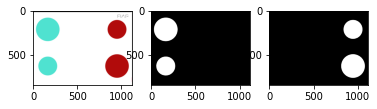

In [14]:
# Aqui definimos os valores das máscaras ciano e vermelho
image_inf_hsv_cyan = np.array([80, 120, 120])  
image_sup_hsv_cyan = np.array([90, 255, 255])
image_inf_hsv_red = np.array([0, 120, 120])  
image_sup_hsv_red = np.array([7, 255, 255])

mask_hsv_cyan = cv2.inRange(img_hsv, image_inf_hsv_cyan, image_sup_hsv_cyan)
mask_hsv_red = cv2.inRange(img_hsv, image_inf_hsv_red, image_sup_hsv_red)

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_hsv_cyan, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(mask_hsv_red, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [ ]:
contornos_cyan, _ = cv2.findContours(mask_hsv_cyan, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos_red, _ = cv2.findContours(mask_hsv_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_rgb_cyan = cv2.cvtColor(mask_hsv_cyan, cv2.COLOR_GRAY2RGB)
mask_rgb_red = cv2.cvtColor(mask_hsv_red, cv2.COLOR_GRAY2RGB)
contornosCyan_img = mask_rgb_cyan.copy() 
contornosRed_img = mask_rgb_red.copy()
print(contornos_red)

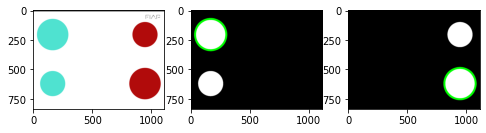

In [16]:
maior_red = None
maior_cyan = None

maior_area_red = 0
maior_area_cyan = 0

for c in contornos_red:
    area = cv2.contourArea(c)
    if area > maior_area_red:
        maior_area_red = area
        maior_red = c
        cnt_red = contornos_red[0]
        M_red = cv2.moments(cnt_red)

for d in contornos_cyan:
    area = cv2.contourArea(d)
    if area > maior_area_cyan:
        maior_area_cyan = area
        maior_cyan = d
        cnt_cyan = contornos_cyan[1]
        M_cyan = cv2.moments(cnt_cyan)

cv2.drawContours(contornosRed_img, [maior_red], -1, [0, 255, 0], 15)
cv2.drawContours(contornosCyan_img, [maior_cyan], -1, [0, 255, 0], 15)

plt.figure(figsize=(8,6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(contornosCyan_img, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(contornosRed_img, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [17]:
cx_cyan = int(M_cyan['m10']/M_cyan['m00'])
cy_cyan = int(M_cyan['m01']/M_cyan['m00'])

print("Massa do maior circulo ciano na posição: ",cx_cyan, cy_cyan)

Massa do maior circulo azul na posição:  165 206


In [18]:
cx_red = int(M_red['m10']/M_red['m00'])
cy_red = int(M_red['m01']/M_red['m00'])

print("Massa do maior circulo vermelho na posição: ",cx_red, cy_red)

Massa do maior circulo vermelho na posição:  945 620


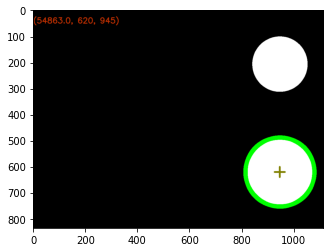

In [19]:
size = 20
color = (128,128,0)


cv2.line(contornosRed_img,(cx_red - size, cy_red),(cx_red + size, cy_red), color, 5)
cv2.line(contornosRed_img,(cx_red, cy_red - size),(cx_red, cy_red + size), color, 5)

#Definindo fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area_red, cy_red, cx_red
origem = (0,50)

cv2.putText(contornosRed_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornosRed_img);

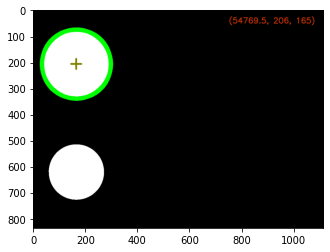

In [20]:
size = 20
color = (128,128,0)

cv2.line(contornosCyan_img,(cx_cyan - size,cy_cyan),(cx_cyan + size,cy_cyan), color, 5)
cv2.line(contornosCyan_img,(cx_cyan, cy_cyan - size),(cx_cyan, cy_cyan + size), color, 5)

# Definimos a fonte para a tela 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area_cyan, cy_cyan , cx_cyan
origem = (750,50)

cv2.putText(contornosCyan_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornosCyan_img);

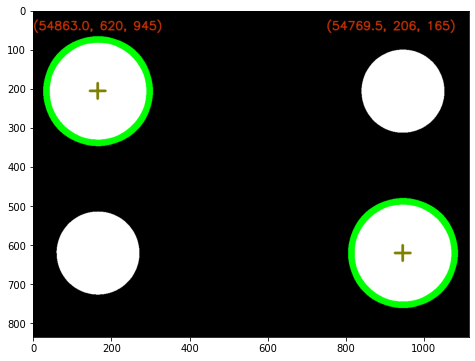

In [21]:
saida = cv2.bitwise_or(contornosRed_img, contornosCyan_img)
plt.figure(figsize=(8,6))
plt.imshow(saida)
plt.show()

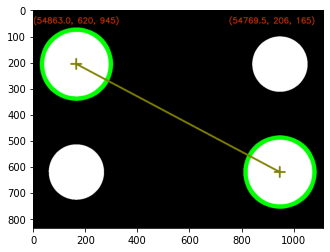

In [22]:
color = (128,128,0)

cv2.line(saida,(cx_red , cy_red),(cx_cyan , cy_cyan), color, 5)
plt.imshow(saida)
plt.show()

In [23]:
ponto01 = (cx_cyan, cy_cyan)
ponto02 = (cx_red, cy_red)

angulo01 = np.arctan2(*ponto01[::-1])
angulo02 = np.arctan2(*ponto02[::-1])

valor = 2*np.pi
angulo = angulo01 - angulo02

valorAngulo = np.rad2deg(angulo % valor)

print("O valor entre o centro das retas é: ",
      int(valorAngulo))

Valor entre o centro das retas:  18


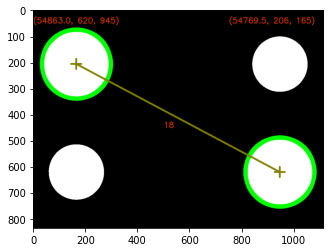

In [24]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = int(valorAngulo)
origem = (500,450)

cv2.putText(saida, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(saida);

In [ ]:
#A referência sobre o cálculo entre as pontas: https://stackoverflow.com/questions/31735499/calculate-angle-clockwise-between-two-points

In [ ]:
#Outras referências colhidas das aulas

